### Step 1: Load and Prepare the Data

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Select relevant columns for clustering
numerical_columns = ['SB Grant Value Post SB 1', 'SB Grant Used Post SB 1', 'Biz Input Post SB 2', 
                     'Biz Cash Post SB 2', 'Biz Inventory Post SB 2', 'Biz Expenses Post SB 2', 
                     'Biz Revenue Post SB 2']

# Extract the relevant data
data = df[numerical_columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


### Step 2: Apply PCA for Visualization
##### We use Principal Component Analysis (PCA) to reduce the dimensionality of the data and visualize it.

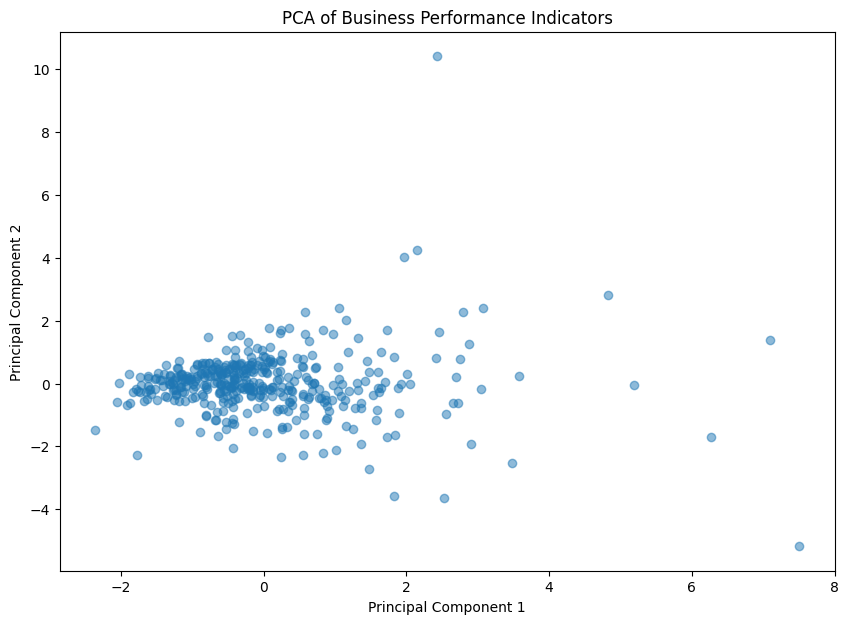

Explained variance ratio: [0.23413639 0.16046246]


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce dimensionality and visualize the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Business Performance Indicators')
plt.show()

# Print explained variance ratio to understand the importance of each principal component
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


### Step 3: Apply KMeans Clustering
#### We use KMeans clustering to group businesses with similar performance indicators.

In [4]:
from sklearn.cluster import KMeans

# Apply KMeans clustering to identify groups of businesses with similar performance
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters


### Step 4: Recommend Trainings Based on Clusters
#### We define training recommendations for each cluster and map them to the businesses.

In [5]:
# Define training recommendations for each cluster
training_recommendations = {
    0: "Financial Management and Budgeting",
    1: "Inventory Management and Supply Chain Optimization",
    2: "Marketing and Sales Strategies"
}

# Map the training recommendations to each business based on their cluster
df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

# Display the first few rows of the dataframe with training recommendations
print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

# Save the dataframe with training recommendations to a new CSV file
df.to_csv('business_training_recommendations.csv', index=False)

print("Training recommendations have been saved to 'business_training_recommendations.csv'.")


  Business Group Name  Cluster  \
0              Aguaru        0   
1             Ocogoru        1   
2             Icikiru        0   
3          Imbazi Mix        0   
4             Ayikoru        2   

                             Training Recommendation  
0                 Financial Management and Budgeting  
1  Inventory Management and Supply Chain Optimiza...  
2                 Financial Management and Budgeting  
3                 Financial Management and Budgeting  
4                     Marketing and Sales Strategies  
Training recommendations have been saved to 'business_training_recommendations.csv'.


#### Python function that can analyze any dataset with numerical performance indicators, automatically detect relevant columns, and recommend training based on business performance:

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def analyze_and_recommend_training(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Automatically detect numerical columns related to business performance
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Extract the relevant data
    data = df[numerical_columns]

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Apply PCA to reduce dimensionality and visualize the data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Plot the principal components
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Business Performance Indicators')
    plt.show()

    # Print explained variance ratio to understand the importance of each principal component
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Apply KMeans clustering to identify groups of businesses with similar performance
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Define training recommendations for each cluster
    training_recommendations = {
        0: "Financial Management and Budgeting",
        1: "Inventory Management and Supply Chain Optimization",
        2: "Marketing and Sales Strategies"
    }

    # Map the training recommendations to each business based on their cluster
    df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

    # Display the first few rows of the dataframe with training recommendations
    print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

    # Save the dataframe with training recommendations to a new CSV file
    output_file_path = 'business_training_recommendations.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Training recommendations have been saved to '{output_file_path}'.")



In [9]:
# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/business_dataset.csv')


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def analyze_and_recommend_training(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Automatically detect numerical columns related to business performance
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Extract the relevant data
    data = df[numerical_columns]

    # Handle missing values by imputing with the mean of each column
    data.fillna(data.mean(), inplace=True)

    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Apply PCA to reduce dimensionality and visualize the data
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Plot the principal components
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Business Performance Indicators')
    plt.show()

    # Print explained variance ratio to understand the importance of each principal component
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Apply KMeans clustering to identify groups of businesses with similar performance
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Define training recommendations for each cluster
    training_recommendations = {
        0: "Financial Management and Budgeting",
        1: "Inventory Management and Supply Chain Optimization",
        2: "Marketing and Sales Strategies"
    }

    # Map the training recommendations to each business based on their cluster
    df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

    # Display the first few rows of the dataframe with training recommendations
    print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

    # Save the dataframe with training recommendations to a new CSV file
    output_file_path = 'business_training_recommendations.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Training recommendations have been saved to '{output_file_path}'.")



C:\Users\GodfreyDrani\AppData\Local\Temp\ipykernel_20680\4244057254.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)


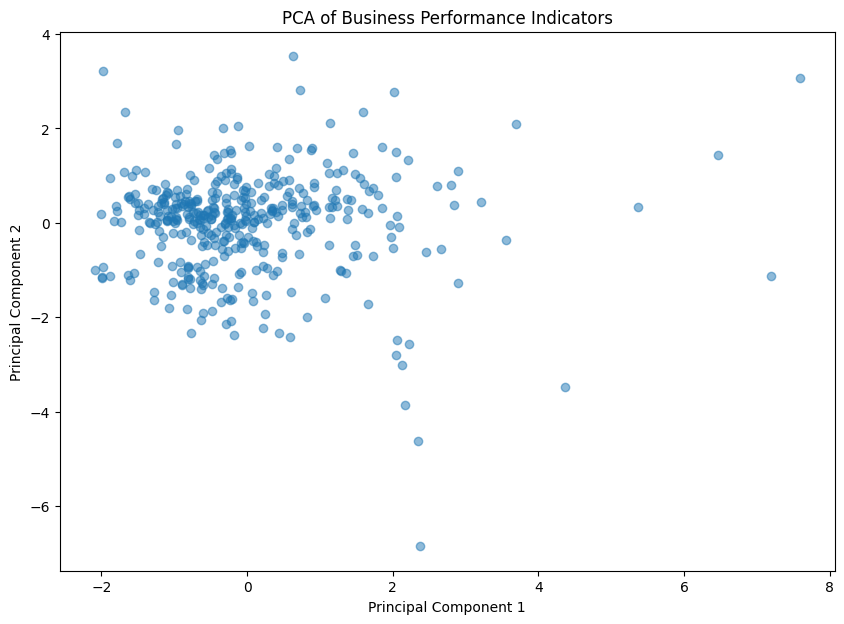

Explained variance ratio: [0.20755916 0.14803654]
  Business Group Name  Cluster  \
0              Aguaru        0   
1             Ocogoru        1   
2             Icikiru        1   
3          Imbazi Mix        0   
4             Ayikoru        2   

                             Training Recommendation  
0                 Financial Management and Budgeting  
1  Inventory Management and Supply Chain Optimiza...  
2  Inventory Management and Supply Chain Optimiza...  
3                 Financial Management and Budgeting  
4                     Marketing and Sales Strategies  
Training recommendations have been saved to 'business_training_recommendations.csv'.


In [11]:
# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/business_dataset.csv')


In [12]:
# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/fy24c1_bps.csv')

C:\Users\GodfreyDrani\AppData\Local\Temp\ipykernel_20680\4244057254.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna(data.mean(), inplace=True)
C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analyze_and_recommend_training(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Automatically detect numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Handle missing values
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    # Define the preprocessing steps for numerical and categorical data
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor with ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    # Create a pipeline that first preprocesses the data and then applies PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2))
    ])

    # Apply the pipeline to the data
    principal_components = pipeline.fit_transform(df)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Plot the principal components
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Business Performance Indicators')
    plt.show()

    # Print explained variance ratio to understand the importance of each principal component
    pca = pipeline.named_steps['pca']
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Apply KMeans clustering to identify groups of businesses with similar performance
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(principal_components)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Define training recommendations for each cluster
    training_recommendations = {
        0: "Financial Management and Budgeting",
        1: "Inventory Management and Supply Chain Optimization",
        2: "Marketing and Sales Strategies"
    }

    # Map the training recommendations to each business based on their cluster
    df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

    # Display the first few rows of the dataframe with training recommendations
    print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

    # Save the dataframe with training recommendations to a new CSV file
    output_file_path = 'business_training_recommendations.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Training recommendations have been saved to '{output_file_path}'.")
# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/fy24c1_bps.csv')



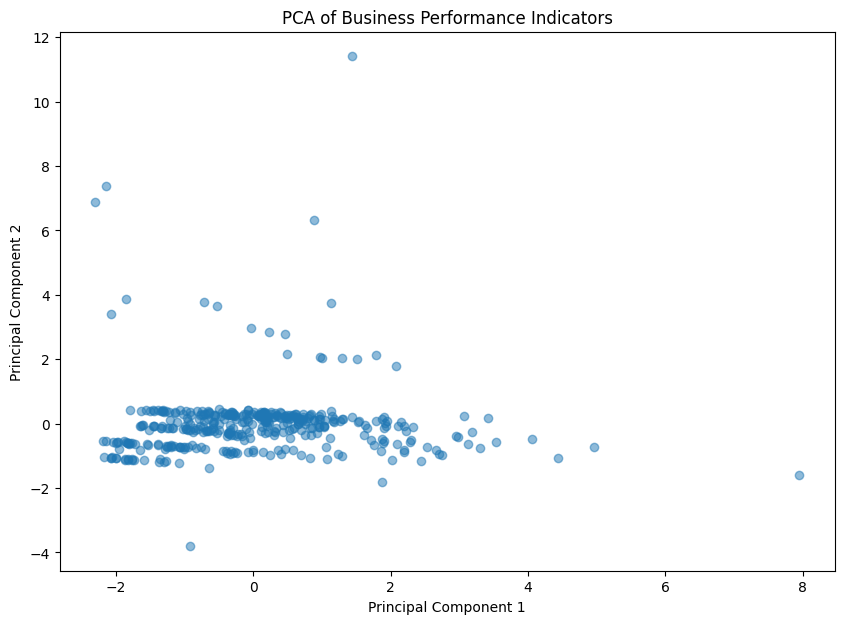

Explained variance ratio: [0.14727175 0.10657047]
  Business Group Name  Cluster  \
0                Amen        0   
1               Iyete        0   
2              Loketa        1   
3               Yenet        0   
4               Grace        1   

                             Training Recommendation  
0                 Financial Management and Budgeting  
1                 Financial Management and Budgeting  
2  Inventory Management and Supply Chain Optimiza...  
3                 Financial Management and Budgeting  
4  Inventory Management and Supply Chain Optimiza...  
Training recommendations have been saved to 'business_training_recommendations.csv'.


In [17]:
# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/fy24c1_bps.csv')


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Define a new column 'Performing_Poorly' based on criteria
# For example, businesses with revenue less than a threshold and expenses more than a threshold
df['Performing_Poorly'] = ((df['Biz Revenue Post SB 2'] < 1000000) & (df['Biz Expenses Post SB 2'] > 500000)).astype(int)

# Select relevant features and target variable
X = df[['Biz Revenue Post SB 2', 'Biz Cash Post SB 2', 'Biz Inventory Post SB 2', 'Biz Expenses Post SB 2']]
y = df['Performing_Poorly']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Function to recommend training or mentoring based on performance
def recommend_action(revenue, cash, inventory, expenses):
    prediction = model.predict([[revenue, cash, inventory, expenses]])
    if prediction[0] == 1:
        return "Recommend Training or Mentoring"
    else:
        return "No Action Needed"

# Example usage with sample data from the dataset
example_business = X_test.iloc[0]
recommendation = recommend_action(example_business['Biz Revenue Post SB 2'], example_business['Biz Cash Post SB 2'], example_business['Biz Inventory Post SB 2'], example_business['Biz Expenses Post SB 2'])
print(f"Recommendation for the example business: {recommendation}")


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Select relevant features and target variable
# Assuming poor performance if expenses are greater than revenue
X = df[['Biz Revenue Post SB 2', 'Biz Cash Post SB 2', 'Biz Inventory Post SB 2', 'Biz Expenses Post SB 2']]
y = df['Biz Revenue Post SB 2'] < df['Biz Expenses Post SB 2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Function to recommend training or mentoring based on performance
def recommend_action(revenue, cash, inventory, expenses):
    prediction = model.predict([[revenue, cash, inventory, expenses]])
    if prediction[0] == 1:
        return "Recommend Training or Mentoring"
    else:
        return "No Action Needed"

# Example usage with sample data from the dataset
example_business = X_test.iloc[0]
recommendation = recommend_action(example_business['Biz Revenue Post SB 2'], example_business['Biz Cash Post SB 2'], example_business['Biz Inventory Post SB 2'], example_business['Biz Expenses Post SB 2'])
print(f"Recommendation for the example business: {recommendation}")


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Select relevant features for clustering
X = df[['Biz Revenue Post SB 2', 'Biz Cash Post SB 2', 'Biz Inventory Post SB 2', 'Biz Expenses Post SB 2']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Function to recommend training or mentoring based on cluster
def recommend_action(cluster):
    if cluster == 0:
        return "Focus on Financial Management Training"
    elif cluster == 1:
        return "Focus on Inventory Management Training"
    else:
        return "Focus on Expense Management Training"

# Example usage with sample data from the dataset
example_business = X_pca[0]
example_cluster = kmeans.predict([example_business])[0]
recommendation = recommend_action(example_cluster)
print(f"Recommendation for the example business: {recommendation}")

# Save the dataframe with cluster labels to a new CSV file
df.to_csv('business_dataset_with_clusters.csv', index=False)


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Select all numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[numerical_features])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Function to recommend training or mentoring based on cluster
def recommend_action(cluster):
    if cluster == 0:
        return "Focus on Financial Management Training"
    elif cluster == 1:
        return "Focus on Inventory Management Training"
    else:
        return "Focus on Expense Management Training"

# Example usage with sample data from the dataset
example_business = X_pca[0]
example_cluster = kmeans.predict([example_business])[0]
recommendation = recommend_action(example_cluster)
print(f"Recommendation for the example business: {recommendation}")

# Save the dataframe with cluster labels to a new CSV file
df.to_csv('business_dataset_with_clusters.csv', index=False)


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Select all numerical features for clustering
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[numerical_features])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Feature selection to identify the most relevant features
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X_scaled, df['Biz Revenue Post SB 2'])

# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Function to recommend training or mentoring based on cluster characteristics
def recommend_action(cluster):
    if cluster == 0:
        return "Focus on Financial Management Training"
    elif cluster == 1:
        return "Focus on Productivity Improvement Training"
    elif cluster == 2:
        return "Focus on Grant Investment Training"
    else:
        return "Focus on Recordkeeping Training"

# Example usage with sample data from the dataset
example_business = X_pca[0]
example_cluster = kmeans.predict([example_business])[0]
recommendation = recommend_action(example_cluster)
print(f"Recommendation for the example business: {recommendation}")

# Save the dataframe with cluster labels to a new CSV file
df.to_csv('business_dataset_with_clusters.csv', index=False)

# Print cluster centers and their characteristics
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("Cluster Characteristics:")
for i in range(len(kmeans.cluster_centers_)):
    print(f"Cluster {i}:")
    print(f"Center: {kmeans.cluster_centers_[i]}")
    print(f"Number of businesses: {sum(kmeans.labels_ == i)}")


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 2 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
C:\Users\GodfreyDrani\Desktop\Business Health\code\venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('dataset/business_dataset.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Select relevant features for clustering
features = ['Biz Cash Post SB 2', 'Biz Inventory Post SB 2', 'Biz Revenue Post SB 2', 'Biz Expenses Post SB 2', 'SB Grant Value Post SB 1', 'Records Kept Post SB 2']

# Encode categorical variables
label_encoder = LabelEncoder()
df['Records Kept Post SB 2'] = label_encoder.fit_transform(df['Records Kept Post SB 2'])

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[features])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA for dimensionality reduction to visualize clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Function to recommend training or mentoring based on cluster characteristics
def recommend_action(cluster):
    if cluster == 0:
        return "Focus on Financial Management Training"
    elif cluster == 1:
        return "Focus on Productivity Improvement Training"
    elif cluster == 2:
        return "Focus on Grant Investment Training"
    else:
        return "Focus on Recordkeeping Training"

# Example usage with sample data from the dataset
example_business = X_pca[0]
example_cluster = kmeans.predict([example_business])[0]
recommendation = recommend_action(example_cluster)
print(f"Recommendation for the example business: {recommendation}")

# Save the dataframe with cluster labels to a new CSV file
df.to_csv('business_dataset_with_clusters.csv', index=False)

# Print cluster centers and their characteristics
print("Cluster Centers:")
print(kmeans.cluster_centers_)

print("Cluster Characteristics:")
for i in range(len(kmeans.cluster_centers_)):
    print(f"Cluster {i}:")
    print(f"Center: {kmeans.cluster_centers_[i]}")
    print(f"Number of businesses: {sum(kmeans.labels_ == i)}")


  Country Cycle: Name Office         BM Cycle Name       Field Associate  \
0  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
1  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
2  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
3  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   
4  Uganda      FY24C2  Yumbe  FY24C2 Annet Eyotaru  Yada Manisuru Kibajo   

  Business Mentor: Full Name  Business Group ID Business Group Name  \
0              Annet Eyotaru              94905              Aguaru   
1              Annet Eyotaru              94906             Ocogoru   
2              Annet Eyotaru              94907             Icikiru   
3              Annet Eyotaru              94908          Imbazi Mix   
4              Annet Eyotaru              94909             Ayikoru   

  Visit Number BOs dropped Post SB 2  # Of BOs dropped Post SB 2  \
0    Post SB 2                    No            

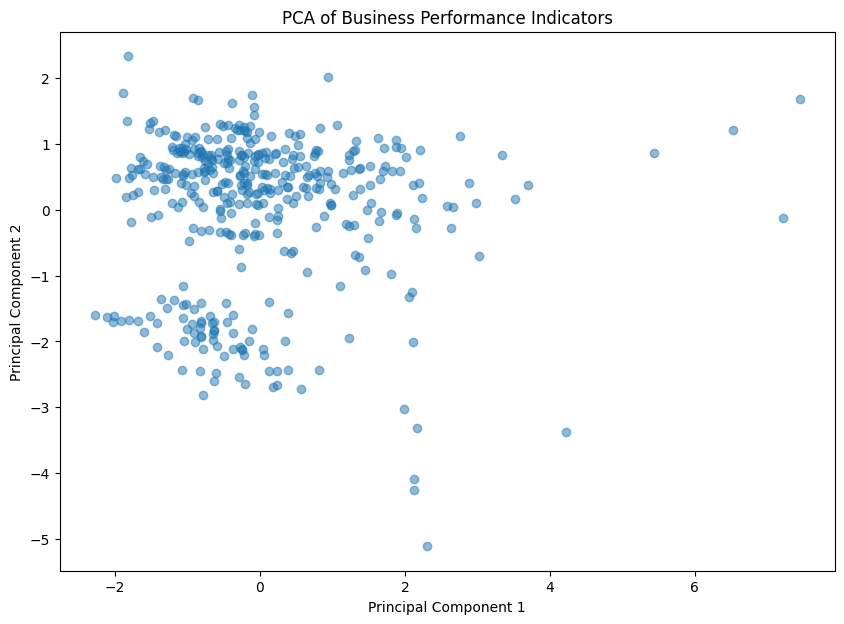

Explained variance ratio: [0.1453574  0.11801317]
  Business Group Name  Cluster  \
0              Aguaru        3   
1             Ocogoru        1   
2             Icikiru        1   
3          Imbazi Mix        3   
4             Ayikoru        2   

                             Training Recommendation  
0                       Recordkeeping and Compliance  
1  Inventory Management and Supply Chain Optimiza...  
2  Inventory Management and Supply Chain Optimiza...  
3                       Recordkeeping and Compliance  
4                     Marketing and Sales Strategies  
Training recommendations have been saved to 'business_training_recommendations.csv'.


In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analyze_and_recommend_training(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Automatically detect numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Handle missing values
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    # Define the preprocessing steps for numerical and categorical data
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor with ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    # Create a pipeline that first preprocesses the data and then applies PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2))
    ])

    # Apply the pipeline to the data
    principal_components = pipeline.fit_transform(df)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Plot the principal components
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Business Performance Indicators')
    plt.show()

    # Print explained variance ratio to understand the importance of each principal component
    pca = pipeline.named_steps['pca']
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Apply KMeans clustering to identify groups of businesses with similar performance
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(principal_components)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Define training recommendations for each cluster
    training_recommendations = {
        0: "Financial Management and Budgeting",
        1: "Inventory Management and Supply Chain Optimization",
        2: "Marketing and Sales Strategies",
        3: "Recordkeeping and Compliance"
    }

    # Map the training recommendations to each business based on their cluster
    df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

    # Display the first few rows of the dataframe with training recommendations
    print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

    # Save the dataframe with training recommendations to a new CSV file
    output_file_path = 'business_training_recommendations.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Training recommendations have been saved to '{output_file_path}'.")

# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/business_dataset.csv')


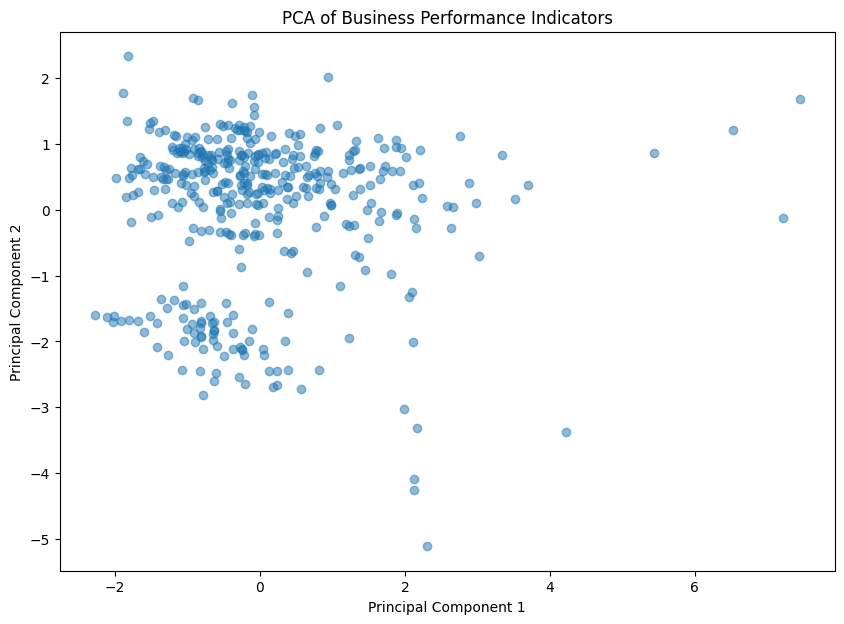

Explained variance ratio: [0.1453574  0.11801317]
  Business Group Name  Cluster  \
0              Aguaru        3   
1             Ocogoru        1   
2             Icikiru        1   
3          Imbazi Mix        3   
4             Ayikoru        2   

                             Training Recommendation  
0                       Recordkeeping and Compliance  
1  Inventory Management and Supply Chain Optimiza...  
2  Inventory Management and Supply Chain Optimiza...  
3                       Recordkeeping and Compliance  
4                     Marketing and Sales Strategies  
Training recommendations have been saved to 'business_training_recommendations.csv'.
Business performance report has been saved to 'business_performance_report.csv'.


In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def analyze_and_recommend_training(file_path):
    # Load the dataset
    df = pd.read_csv(file_path)

    # Automatically detect numerical and categorical columns
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Handle missing values
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    # Define the preprocessing steps for numerical and categorical data
    numerical_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    # Create a preprocessor with ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    # Create a pipeline that first preprocesses the data and then applies PCA
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=2))
    ])

    # Apply the pipeline to the data
    principal_components = pipeline.fit_transform(df)

    # Create a DataFrame with the principal components
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

    # Plot the principal components
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Business Performance Indicators')
    plt.show()

    # Print explained variance ratio to understand the importance of each principal component
    pca = pipeline.named_steps['pca']
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

    # Apply KMeans clustering to identify groups of businesses with similar performance
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(principal_components)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = clusters

    # Define training recommendations for each cluster
    training_recommendations = {
        0: "Financial Management and Budgeting",
        1: "Inventory Management and Supply Chain Optimization",
        2: "Marketing and Sales Strategies",
        3: "Recordkeeping and Compliance"
    }

    # Map the training recommendations to each business based on their cluster
    df['Training Recommendation'] = df['Cluster'].map(training_recommendations)

    # Display the first few rows of the dataframe with training recommendations
    print(df[['Business Group Name', 'Cluster', 'Training Recommendation']].head())

    # Save the dataframe with training recommendations to a new CSV file
    output_file_path = 'business_training_recommendations.csv'
    df.to_csv(output_file_path, index=False)

    print(f"Training recommendations have been saved to '{output_file_path}'.")

    # Generate a report with key performing business indicators and business per BM cycle
    report = df.groupby('BM Cycle Name').agg({
        'Biz Cash Post SB 2': ['mean', 'sum'],
        'Biz Inventory Post SB 2': ['mean', 'sum'],
        'Biz Revenue Post SB 2': ['mean', 'sum'],
        'Biz Expenses Post SB 2': ['mean', 'sum'],
        'SB Grant Value Post SB 1': ['mean', 'sum'],
        'Business Group Name': 'count'
    }).rename(columns={'Business Group Name': 'Number of Businesses'})

    report.columns = ['_'.join(col).strip() for col in report.columns.values]
    
    report_output_file_path = 'business_performance_report.csv'
    report.to_csv(report_output_file_path)

    print(f"Business performance report has been saved to '{report_output_file_path}'.")

# Call the function with the path to the dataset file
analyze_and_recommend_training('dataset/business_dataset.csv')
